# Consuming my API

## Run `python servery.py` on your terminal to start the server.

In [1]:
%matplotlib inline
import jsonpickle
import requests
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
#prepare img for api
img = cv2.imread('./sample_imgs/img_1.jpg')
#encode image
_, img_encoded = cv2.imencode('.jpg', img)
#convert image to string
img_string = img_encoded.tostring()
#b, g, r = cv2.split(img)
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Prepare data for API

In [3]:
#you can either pass URL or an image file.
data = {'url':'', 'file':img_string}
data = jsonpickle.encode(data)

## Send data to API

In [4]:
api_url = 'http://localhost:8000/api/edge' #you can verify on your cli once you start the server
r = requests.post(api_url, data=data, headers={'content-type':'application/json'})

In [5]:
#result from the api is of the form {'output':encoded_image}
new_data = r.text
new_data = jsonpickle.decode(new_data)
out_img = new_data['output']
nparr = np.frombuffer(out_img, np.uint8)
image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

Text(0.5, 1.0, 'EDGE IMAGE')

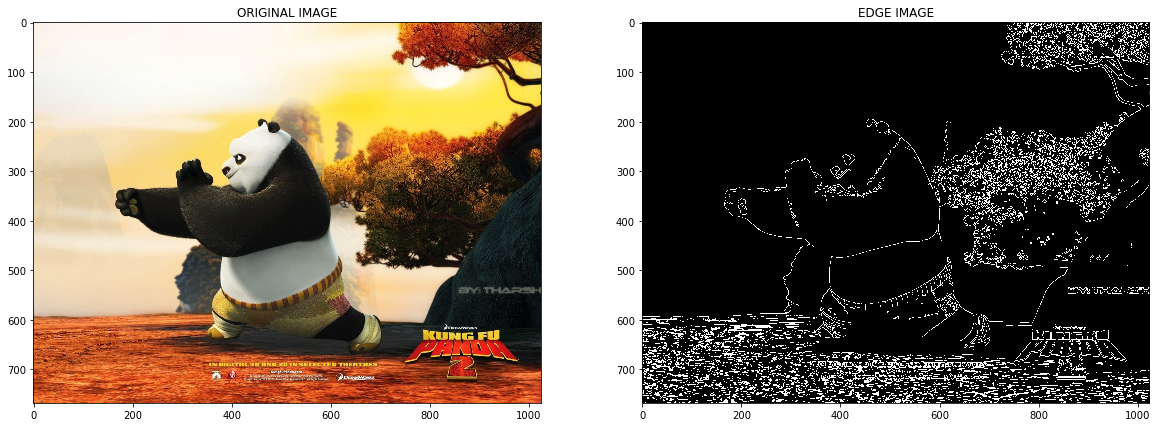

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(new_img)
plt.title('ORIGINAL IMAGE')
plt.subplot(122)
plt.imshow(image)
plt.title("EDGE IMAGE")